# Facial Expression Detection using Convolutional Neural Networks 🤖📷

Facial expression detection is a fascinating field within computer vision that involves the recognition and interpretation of human emotions based on facial expressions. In this Jupyter Notebook, we'll build a Facial Expression Detection model using Convolutional Neural Networks (CNNs). This model will be trained to classify facial expressions into different emotion categories, such as happiness, sadness, anger, etc. 😊😢😠

### Goal 🚀💻
The primary goal of this project is to create an effective facial expression detection system that can be integrated into various applications, including human-computer interaction, virtual reality, and emotion-aware technology.

### Tools & Libraries 🛠️

We will be using the below tools and libriaries for our implementation
- TensorFlow: An open-source machine learning framework that includes tools for building and training deep learning models.
- Keras: A high-level neural network API that runs on top of TensorFlow, making it easier to build and experiment with deep learning models.
- Matplotlib: A visualisation library 📊🐍

## Implementation Steps
1. **Environment setup:** 
2. **Import necessary libraries:**
3. **Dataset collection:**
4. **Data Augmentation:**
5. **CNN model building:**
6. **Model training:**
7. **Model evaluation:**

Throughout the notebook, we'll provide detailed explanations, code snippets and visualizations to ensure a clear understanding of the entire process. 🧠🛠️

Let's get started! 🚀🚀🚀🚀

## Step 1: Environment setup
Ensure all necessary libraries are installed. Installation can be achieved using the below command

In [ ]:
# Use the pip to install the necessary libraries
# !pip install tensorflow
# !pip install numpy
# !pip install matplotlib
# !pip install opencv-python


# The below code snippet is used to check the versions of the libraries
import tensorflow as tf
import numpy as np
import matplotlib
import cv2

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("OpenCV version:", cv2.__version__)




## Step 2: Import necessary libraries

Import all required libraries in this section of your notebook. It is always good practice to keep your code tidy and well structured.

In [13]:
# operating system libraries
import os
import random

# Open Computer vision libraries
import cv2 as cv

# File operation libraries
import shutil
import yaml
import pandas as pd

# Deep learning libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping


# visualization libraries
import matplotlib.pyplot as plt

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

## Step 3: Dataset collection

For the purpose this exercise, we will use facial expression dataset named **[FER2013](https://www.kaggle.com/datasets/msambare/fer2013)** from Kaggle. 
The **[FER2013](https://www.kaggle.com/datasets/msambare/fer2013)** dataset is intended for use in facial expression recognition tasks.

According to the instructions on the Kaggle website, the entire data set is separated into train-test folders with image in grayscale All images are exactly 48 x 48 pixels.

The dataset is divided into two parts:

- train (28,709 images)
- test (7,178 images)


There are 8 emotion classes which are mapped as:
- 0- Anger
- 1- Disgust
- 2- Fear
- 3- Happy
- 4- Sad
- 5- Surprise
- 6- Neutral



In [3]:
# Define dataset directory
dataset_dir = "dataset/fer2013"

# Define image subdirectories for test, train, validation sets
train_image_dir = os.path.join(dataset_dir, "train")
test_image_dir = os.path.join(dataset_dir, "test")

# Lets try and list the image files in each directory
train_images = os.listdir(train_image_dir)
test_images = os.listdir(test_image_dir)


### Lets explore the data a little bit

In [21]:
def count_files_in_each_directory(directory):
    directory_counts = {}
    for dir_name in os.listdir(directory):
        directory_path = os.path.join(directory, dir_name)
        if os.path.isdir(directory_path):
            directory_counts[dir_name] = len(os.listdir(directory_path))
    return pd.DataFrame(directory_counts, index=['count'])
        
    

In [24]:
train_directory = dataset_dir + '/train'
test_directory = dataset_dir + '/test'

train_counts_df = count_files_in_each_directory(train_directory)
test_counts_df = count_files_in_each_directory(test_directory)

print("Train directory counts:")
print(train_counts_df)

print("\nTest directory counts:")
print(test_counts_df)

Train directory counts:
       angry  disgusted  fearful  happy  neutral   sad  surprised
count   3995        436     4097   7215     4965  4830       3171

Test directory counts:
       angry  disgusted  fearful  happy  neutral   sad  surprised
count    958        111     1024   1774     1233  1247        831


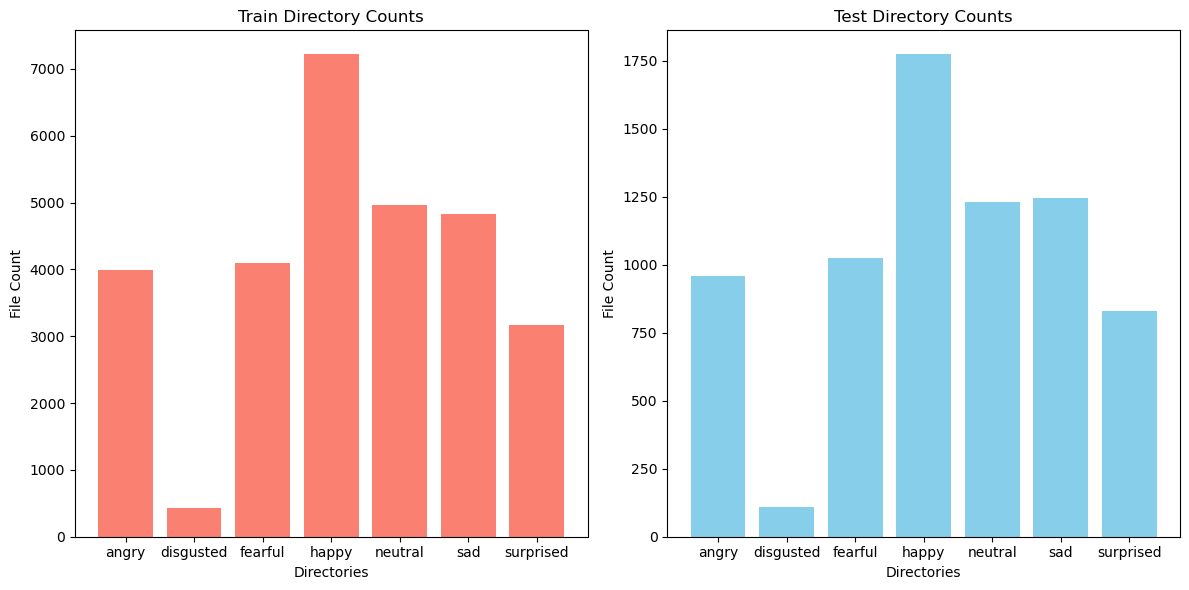

In [27]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Train directory counts
axes[0].bar(train_counts_df.columns, train_counts_df.loc['count'], color='salmon')
axes[0].set_title('Train Directory Counts')
axes[0].set_xlabel('Directories')
axes[0].set_ylabel('File Count')

# Test directory counts
axes[1].bar(test_counts_df.columns, test_counts_df.loc['count'], color='skyblue')
axes[1].set_title('Test Directory Counts')
axes[1].set_xlabel('Directories')
axes[1].set_ylabel('File Count')

plt.tight_layout()
plt.show()


In [ ]:
# Create a function to display some sample images from each directory
def display_images(directory, images):
    plt.figure(figsize=(8, 8))
    
    # Display 9 random images
    random_images = random.sample(images, 9)
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img_path = os.path.join(directory, random_images[i])
        
        # Read image using cv.imread
        img = cv.imread(img_path)
        
        # OpenCV loads images in BGR, thus we need to convert to RGB
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        # Plot image using matplotlib
        plt.imshow(img)
        plt.axis('off')
        plt.title(images[i])
        

### Image Display

In [ ]:
# Display train set images
display_images(train_image_dir, train_images)
plt.suptitle('Sample Images from Train Set')
plt.show()

# Display validation set images
display_images(valid_image_dir, valid_images)
plt.suptitle('Sample Images from Validation Set')
plt.show()

# Display Test set images
display_images(test_image_dir, test_images)
plt.suptitle('Sample Images from Test Set')
plt.show()



### 3.1 Organize YOLO_format dataset into their respective classes


In [ ]:
# Lets define label mapping
labels_map = {
    0 : 'Anger',
    1 : 'Contempt',
    2 : 'Disgust',
    3 : 'Fear',
    4 : 'Happy',
    5 : 'Neutral',
    6 : 'Sad',
    7 : 'Suprise'
}

In [ ]:
# Lets create a couple of functions to carry out this activity.
     
def organize_images_by_class(image_dir, output_dir, label_path):
    # Create output directory for various classes
    os.makedirs(output_dir, exist_ok=True)

    images = os.listdir(image_dir)
    for image in images:
        image_path = os.path.join(image_dir, image)

        # Extract class label from the label file content
        label_file_path = os.path.join(label_path, os.path.splitext(image)[0] + '.txt')
        if not os.path.exists(label_file_path):
            # Skip if the label file is missing
            print(f"Warning: Label file not found for image {image}")
            continue

        with open(label_file_path, 'r') as label_file:
            class_label = int(label_file.readline().split()[0])

        # Map class label to class name
        class_name = labels_map.get(class_label, f'Unknown_Class_{class_label}')

        # Create class subdirectory if not exists
        class_path = os.path.join(output_dir, class_name)
        os.makedirs(class_path, exist_ok=True)

        # Copy image to the class subdirectory
        shutil.copy(image_path, os.path.join(class_path, image))
        print(f"Organized {image} to {class_name}")

def create_image_datasets(data_path, output_path, label_path):
    # Define paths for train, validation, and test sets
    train_images_dir = os.path.join(data_path, 'train/images')
    train_labels_dir = os.path.join(data_path, 'train/labels')
    train_output_dir = os.path.join(output_path, 'train')

    valid_images_dir = os.path.join(data_path, 'valid/images')
    valid_labels_dir = os.path.join(data_path, 'valid/labels')
    valid_output_dir = os.path.join(output_path, 'valid')

    test_images_dir = os.path.join(data_path, 'test/images')
    test_labels_dir = os.path.join(data_path, 'test/labels')
    test_output_dir = os.path.join(output_path, 'test')

    # Organize images for train set
    organize_images_by_class(train_images_dir, train_output_dir, train_labels_dir)

    # Organize images for validation set
    organize_images_by_class(valid_images_dir, valid_output_dir, valid_labels_dir)

    # Organize images for test set
    organize_images_by_class(test_images_dir, test_output_dir, test_labels_dir)

### Organize YOLO datasets

In [ ]:
# Define paths
data_path = "dataset/YOLO_format/"
output_path = "dataset/image_dataset/"
label_path = "dataset/YOLO_format/"

create_image_datasets(data_path, output_path, label_path)

### Instantiate organize image directories

In [ ]:
# Define organized image dataset directory
image_dataset_dir = "dataset\image_dataset"

# Define image subdirectories for test, train, validation sets
train_image_dir = os.path.join(image_dataset_dir, "train", "Anger")
valid_image_dir = os.path.join(image_dataset_dir, "valid", "Anger")
test_image_dir = os.path.join(image_dataset_dir, "test", "Anger")

# Lets try and list the image files in each directory
train_images = os.listdir(train_image_dir)
valid_images = os.listdir(valid_image_dir)
test_images = os.listdir(test_image_dir)

## Step 4: Data Augmentation:
The data augmentation helps to increase the diversity of the training dataset, thus improving the generalization of the model. TensorFlow provides

The images have different backgrounds which can interfere with the model performance. We need to focus only on the Region Of Interest (ROI) which is the face.

We will use pre-trained **[Haar-cascade](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)** face classifier from OpenCV for face detection.


### Remove noisy background

The below code is an adaptation from the tutorial code on **[Haar-cascade](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)** website.

In [ ]:
# # Load the pre-trained Haar-cascade face classifier from OpenCV
# face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_alt.xml')

# # Function to extract face from iamge
# def extract_face(img_path):
#     img = cv.imread(img_path)
#     gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
#     # Detect face in the image
#     face = face_cascade.detectMultiScale(gray, scaleFactor=1.03, minNeighbors=2)
    
#     # Extract ROI for each face
#     extracted_face = [img[y:y+h, x:x+w] for (x, y, w, h) in face]
    
#     return extracted_face

# # Function to display sample images with extracted face.
# def display_image_with_face(directory, images):
#     plt.figure(figsize=(8, 8))
    
#     # Display 9 random images
#     random_images = random.sample(images, 9)
    
#     for i in range(9):
#         plt.subplot(3, 3, i+1)
#         img_path = os.path.join(directory, random_images[i])
#         extracted_face = extract_face(img_path)
        
#         if extracted_face:
#             # Display the first extracted face
#             plt.imshow(cv.cvtColor(extracted_face[0], cv.COLOR_BGR2RGB))
#             plt.axis('off')
#             plt.title(random_images[i])    

### Image Display of Extracted face

In [ ]:
# # Display train set images with extracted faces
# display_image_with_face(train_image_dir, train_images)
# plt.suptitle('Sample Images from Train Set with Extracted Faces')
# plt.show()

# # Display validation set images with extracted faces
# display_image_with_face(valid_image_dir, valid_images)
# plt.suptitle('Sample Images from Validation Set with Extracted Faces')
# plt.show()

### Data augmentation

In [ ]:
# Data augmentation parameters for training sets
train_datagen = ImageDataGenerator (
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for validation and test sets (usually no augmentation is necessary for these data sets)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# # Load and preprocess a sample image for demonstration
# sample_img_path = os.path.join(train_image_dir, train_images[0])
# sample_img = extract_face(sample_img_path)
# sample_img = cv.cvtColor(sample_img[0], cv.COLOR_BGR2RGB)
# sample_img = sample_img.reshape((1,) + sample_img.shape) # Reshape to (1, height, width, channels)

# # Display original and augmented images for comparison
# plt.figure(figsize=(8, 8))

# # Original image
# plt.subplot(1, 4, 1)
# plt.imshow(sample_img[0])
# plt.title('Original Image')
# plt.axis('off')

# # Augmented image
# for i, augmented_img in enumerate(train_datagen.flow(sample_img, batch_size=1)):
#     plt.subplot(1, 4, i + 2)
#     plt.imshow(augmented_img[0])
#     plt.title(f'Augmented Image {i + 1}')
#     plt.axis('off')
    
#     # Lets Display three augmented images for demonstration
#     if i == 2:
#         break

# plt.tight_layout()
# plt.show()

### Image generators

In [ ]:
# Define image directories, train, validation sets for image generators
train_image_dir = os.path.join(image_dataset_dir, "train")
valid_image_dir = os.path.join(image_dataset_dir, "valid")
test_image_dir = os.path.join(image_dataset_dir, "test")

In [ ]:
# Create generator for training, validation, and test sets

image_size = (96, 96) # We maintain original sizes of images.
batch_size = 32

# train_datagen

train_generator = train_datagen.flow_from_directory(
    train_image_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True # Enable shuffle to make model more robust
)

validation_generator = val_test_datagen.flow_from_directory(
    valid_image_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False # Disable shuffle to maintain order of labels
)


In [ ]:
train_generator.class_indices

## Step 5: CNN model building:

Our model architecture for this task will comprise of **3 convolutional layers** with **2 fully connected layers**. <br>
1. The first convolutional layer comprises of **32 filters** with a **kernel of 3x3** and **1 stride** with an input shape of **96 x 96 x 3** and activation function as **ReLu**.
2. The second convolutional layer comprises of **64 filters** with a **kernel of 3x3** and activation function as **ReLu**
3. The third convolutional layer comprises of **128 filters** with a **kernel of 3x3** and activation function as **ReLu**
4. The first fully connected layer comprise of **256 hidden neurons** and activation function as **ReLu**
5. The second fully connected layer comprise of **8 output neurons** and activation function as **softmax**

Note:
References are made to the **[TensorFlow CNN model example](https://www.tensorflow.org/tutorials/images/cnn)** and **[Keras image classification example](https://keras.io/examples/vision/image_classification_from_scratch/)** from the official TensorFlow and Keras website.

In [ ]:
# Image Shape
image_shape = (96, 96, 3)

# create sequential module
cnn_model = Sequential()

cnn_model.add(InputLayer(input_shape=image_shape))

# First Convolution layer
cnn_model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(32, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.25))
cnn_model.add(Conv2D(64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.25))
cnn_model.add(Conv2D(128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(8, activation='softmax'))

### 5.1 Compile the model
I mostly make use of **[TensorFlow official reference doc](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy
)** when building deep nueral network models

In [ ]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Lets display the architecture of our model
cnn_model.summary()

## Step 6: Model training :
In this section we train the model using the prepared data generators and monitor its performance over multiple epochs.

In [ ]:
# Instantiate early stopping (This helps monitor validation loss and prevent possible overfitting)
early_stopping_callback  = EarlyStopping(
    monitor='accuracy',
    mode='max',
    patience=10,
    restore_best_weights=True
)

In [ ]:
# use the ?? to get a complete description of the commands. 

# cnn_model.fit??

In [ ]:
# Train model
train_history = cnn_model.fit(
    train_generator,
    epochs=200,
    validation_data=validation_generator,
    callbacks=[early_stopping_callback]
    
)

## Step 7: Model evaluation :
We evaluate the trained model's performance by visualizing training history.

In [ ]:
# We create two functions to help us visualize the loss and accuracy of the model

def plot_loss(train_loss, val_loss):
    fig, ax = plt.subplots()
    ax.plot(train_loss, color='teal', label='Training Loss')
    ax.plot(val_loss, color='orange', label='Validation Loss')
    
    ax.set_title('Loss', fontsize=20)
    ax.legend(loc="upper left")
    plt.show()

def plot_accuracy(train_accuracy, val_accuracy):
    fig, ax = plt.subplots()
    ax.plot(train_accuracy, color='teal', label='Training Accuracy')
    ax.plot(val_accuracy, color='orange', label='Validation Accuracy')
    
    ax.set_title('Accuracy', fontsize=20)
    ax.legend(loc="upper left")
    plt.show()

In [ ]:
# Plot the loss graph
train_loss_history = train_history.history['loss']
val_loss_history = train_history.history['val_loss']
plot_loss(train_loss_history, val_loss_history)

# Plot the accuracy
train_accuracy_history = train_history.history['accuracy']
val_accuracy_history = train_history.history['val_accuracy']
plot_accuracy(train_accuracy_history, val_accuracy_history)